In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data and assign
df = pd.read_csv("../datasets/train.csv")
kaggle_data = pd.read_csv("../datasets/test.csv")

In [3]:
# preview the data
kaggle_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [4]:
# check column difference for dependent variable
set(df.columns) - set(kaggle_data.columns)

{'SalePrice'}

In [5]:
# drop columns containing null values
df = df.dropna(axis=1)._get_numeric_data()
kaggle_data = kaggle_data.dropna(axis=1)._get_numeric_data()

In [6]:
# preview the data
df.head()

,Id,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,13517,6,8,1976,2005,725,754,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,11492,7,5,1996,1997,913,1209,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,7922,5,7,1953,2007,1057,0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,9802,5,5,2006,2007,744,700,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,14235,6,8,1900,1993,831,614,...,0,59,0,0,0,0,0,3,2010,138500


In [7]:
# remove spaces and lowercase column names in both datasets
df.columns = [col.replace(" ", "_").lower() for col in df.columns]
kaggle_data.columns = [col.replace(" ", "_").lower() for col in kaggle_data.columns]

In [8]:
# view correlation between saleprice and variables
df.corr()[["saleprice"]].sort_values(by="saleprice", ascending=False)

,saleprice
saleprice,1.000000
overall_qual,0.800207
gr_liv_area,0.697038
1st_flr_sf,0.618486
year_built,0.571849
year_remod/add,0.550370
full_bath,0.537969
totrms_abvgrd,0.504014
fireplaces,0.471093
open_porch_sf,0.333476


In [9]:
# drop columns with a correlation less than .29
drop_columns = columns = [
    "bedroom_abvgr",
    "screen_porch",
    "3ssn_porch",
    "pool_area",
    "misc_val",
    "mo_sold",
    "yr_sold",
    "low_qual_fin_sf",
    "id",
    "ms_subclass",
    "overall_cond",
    "kitchen_abvgr",
    "enclosed_porch",
    "pid",
    "2nd_flr_sf",
    "half_bath",
]
df = df.drop(columns=drop_columns)

In [10]:
# verify that all columns are numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   lot_area        2051 non-null   int64
 1   overall_qual    2051 non-null   int64
 2   year_built      2051 non-null   int64
 3   year_remod/add  2051 non-null   int64
 4   1st_flr_sf      2051 non-null   int64
 5   gr_liv_area     2051 non-null   int64
 6   full_bath       2051 non-null   int64
 7   totrms_abvgrd   2051 non-null   int64
 8   fireplaces      2051 non-null   int64
 9   wood_deck_sf    2051 non-null   int64
 10  open_porch_sf   2051 non-null   int64
 11  saleprice       2051 non-null   int64
dtypes: int64(12)
memory usage: 192.4 KB


In [11]:
# again check correlation of featured columns
df.corr()[["saleprice"]].sort_values(by="saleprice", ascending=False)

,saleprice
saleprice,1.000000
overall_qual,0.800207
gr_liv_area,0.697038
1st_flr_sf,0.618486
year_built,0.571849
year_remod/add,0.550370
full_bath,0.537969
totrms_abvgrd,0.504014
fireplaces,0.471093
open_porch_sf,0.333476


# Removing Outliers

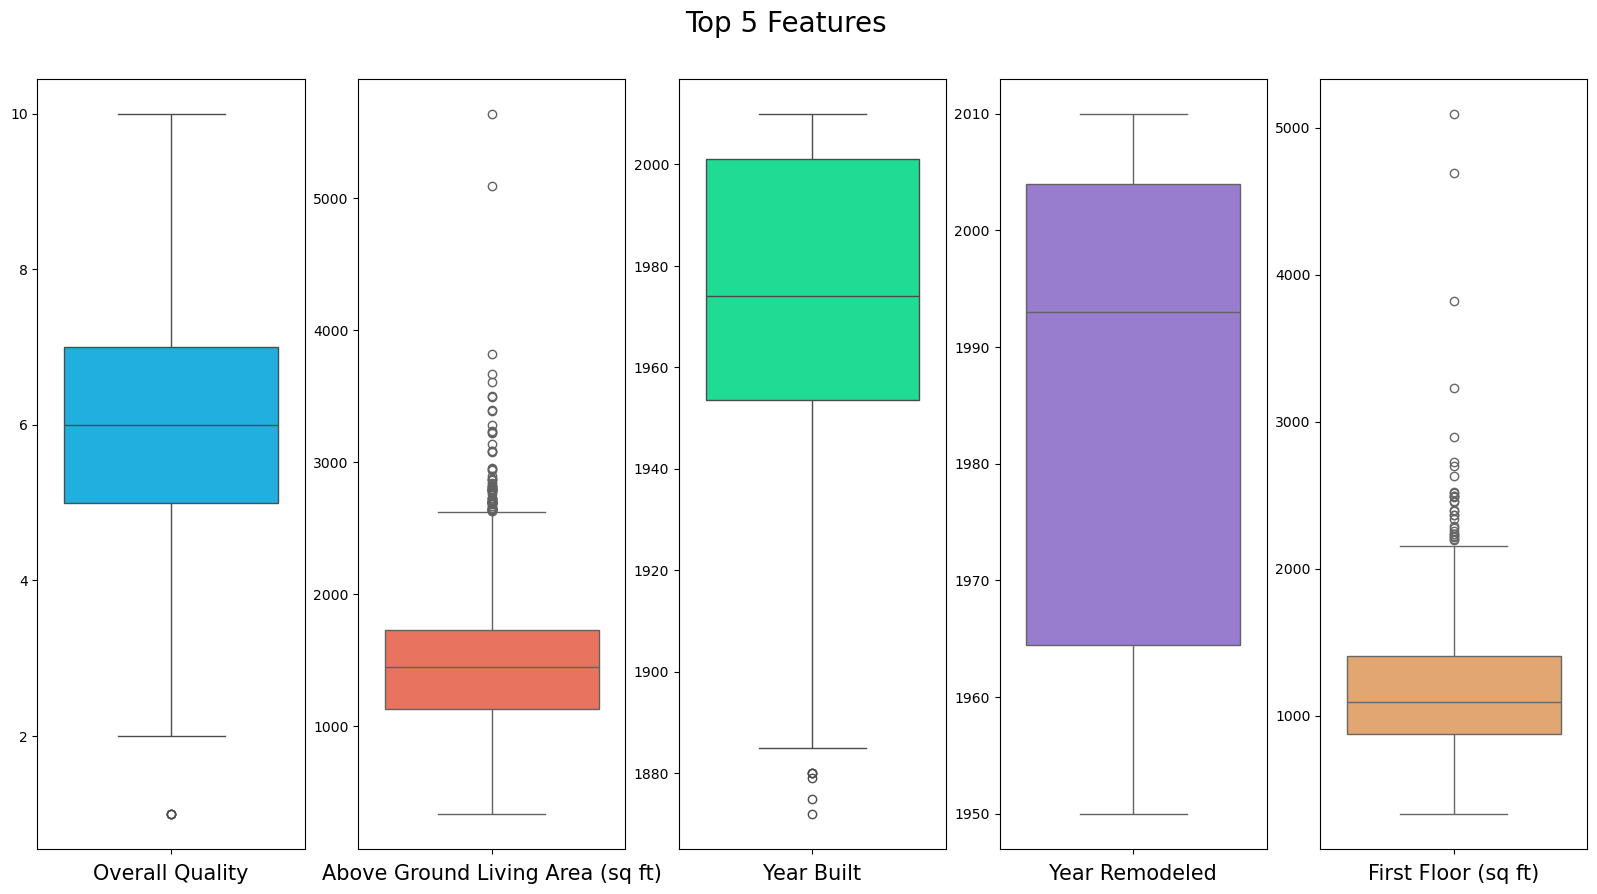

In [12]:
# Visually seeing if outliers are present

fig, axs = plt.subplots(1, 5, figsize=(20, 10))
plt.title("Top 5 Features", size=20, x=-2, y=1.05)

# overall_qual
sns.boxplot(ax=axs[0], data=df, y=df["overall_qual"], color="deepskyblue")
axs[0].set_xlabel("Overall Quality", size=15)
axs[0].set_ylabel(None)

# gr_liv_area
sns.boxplot(ax=axs[1], data=df, y=df["gr_liv_area"], color="tomato")
axs[1].set_xlabel("Above Ground Living Area (sq ft)", size=15)
axs[1].set_ylabel(None)

# year_built
sns.boxplot(ax=axs[2], data=df, y=df["year_built"], color="mediumspringgreen")
axs[2].set_xlabel("Year Built", size=15)
axs[2].set_ylabel(None)

# year_remod/add
sns.boxplot(ax=axs[3], data=df, y=df["year_remod/add"], color="mediumpurple")
axs[3].set_xlabel("Year Remodeled", size=15)
axs[3].set_ylabel(None)

# 1st_flr_sf
sns.boxplot(ax=axs[4], data=df, y=df["1st_flr_sf"], color="sandybrown")
axs[4].set_xlabel("First Floor (sq ft)", size=15)
axs[4].set_ylabel(None)


plt.savefig("../images/boxplt1.png")

In [13]:
# great difference between min and 25th percentile, and 75th percentile and max
df.describe()

,lot_area,overall_qual,year_built,year_remod/add,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,fireplaces,wood_deck_sf,open_porch_sf,saleprice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,10065.208191,6.112140,1971.708922,1984.190151,1164.488055,1499.330083,1.577279,6.435885,0.590931,93.833740,47.556802,181469.701609
std,6742.488909,1.426271,30.177889,21.036250,396.446923,500.447829,0.549279,1.560225,0.638516,128.549416,66.747241,79258.659352
min,1300.000000,1.000000,1872.000000,1950.000000,334.000000,334.000000,0.000000,2.000000,0.000000,0.000000,0.000000,12789.000000
25%,7500.000000,5.000000,1953.500000,1964.500000,879.500000,1129.000000,1.000000,5.000000,0.000000,0.000000,0.000000,129825.000000
50%,9430.000000,6.000000,1974.000000,1993.000000,1093.000000,1444.000000,2.000000,6.000000,1.000000,0.000000,27.000000,162500.000000
75%,11513.500000,7.000000,2001.000000,2004.000000,1405.000000,1728.500000,2.000000,7.000000,1.000000,168.000000,70.000000,214000.000000
max,159000.000000,10.000000,2010.000000,2010.000000,5095.000000,5642.000000,4.000000,15.000000,4.000000,1424.000000,547.000000,611657.000000


In [14]:
# removing some outliers from all data columns
# I dont want to remove too much however
low = df.quantile(0.20)
high = df.quantile(0.80)
outliers = high - low

lower = low - 1.5 * outliers
upper = high + 1.5 * outliers

clean = (df >= lower) & (df <= upper)
df = df[clean]

In [15]:
df.shape

(2051, 12)

In [16]:
df.dropna(inplace=True)

In [17]:
# lost almost 200 rows
df.shape

(1860, 12)

In [18]:
# export and save cleaned data
df.to_csv("../datasets/cleaned/cleaned_train.csv", index = False)
kaggle_data.to_csv("../datasets/cleaned/cleaned_test.csv", index = False)